<a href="https://colab.research.google.com/github/Fazloussatter/ETH-Price-Prediction-in-EUR-with-Tensorflow-and-Python.ipynb/blob/main/ETH_Price_Prediction_in_EUR_with_Tensorflow_and_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing essential packages and modules

In [71]:
!pip install tensorflow

In [72]:
%pip install scikit-learn

In [73]:
%pip install yfinance

#Importing essential libraries and modules

In [74]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential


#Selecting the Crypto currency and converter

In [75]:
cryptpo_currency="ETH"
against_currency="EUR"

#Selecting the star and end time

In [76]:
start=dt.datetime(2015,1,1)
end=dt.datetime.now()

#Downloading the data

In [77]:
data=yf.download(f"{cryptpo_currency}-{against_currency}",start,end)

/tmp/ipython-input-77-3441151826.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(f"{cryptpo_currency}-{against_currency}",start,end)
[*********************100%***********************]  1 of 1 completed


#Checking the data

In [78]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,ETH-EUR,ETH-EUR,ETH-EUR,ETH-EUR,ETH-EUR
Date,,,,,
2017-11-11,269.811371,273.902954,255.673492,256.011322,722199256
2017-11-12,264.072021,273.739624,255.948730,269.819092,1383773530
2017-11-13,271.556213,281.949707,263.405121,263.314758,893329318
2017-11-14,286.394958,290.873871,271.573212,271.596497,907354313
2017-11-15,282.937531,289.079956,279.644714,286.677399,613364441


#Preparing data and setting predition days

In [79]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))
prediction_days=70
future_days=30
x_train,y_train=[],[]
for x in range(prediction_days,len(scaled_data)-future_days):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x+future_days,0])

In [80]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

#Creating a Neural Network

In [81]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#Now Compiling the model

In [82]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=30,batch_size=40)


Epoch 1/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0346
Epoch 2/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0133
Epoch 3/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0120
Epoch 4/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0123
Epoch 5/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0136
Epoch 6/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0107
Epoch 7/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0110
Epoch 8/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0118
Epoch 9/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0103
Epoch 10/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0113
Epoch 11/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0108
Epoch 12/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0110
Epoch 13/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0106
Epoch 14/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0102
Epoch 15/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0105
Epoc

#Testing the model

In [83]:
test_start=dt.datetime(2022,1,1)
test_end=dt.datetime.now()

In [84]:
test_data=yf.download(f"{cryptpo_currency}-{against_currency}",test_start,test_end)
actual_prices=test_data['Close'].values

/tmp/ipython-input-84-192880520.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  test_data=yf.download(f"{cryptpo_currency}-{against_currency}",test_start,test_end)
[*********************100%***********************]  1 of 1 completed


In [85]:
total_dataset=pd.concat((data['Close'],test_data['Close']),axis=0)

In [86]:
model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.fit_transform(model_inputs)

In [87]:
x_test=[]
for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])


In [88]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# Making predictions regarding future price

In [89]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices) # Inverse transform to get actual price values

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


#Visualizing the actual and predited price

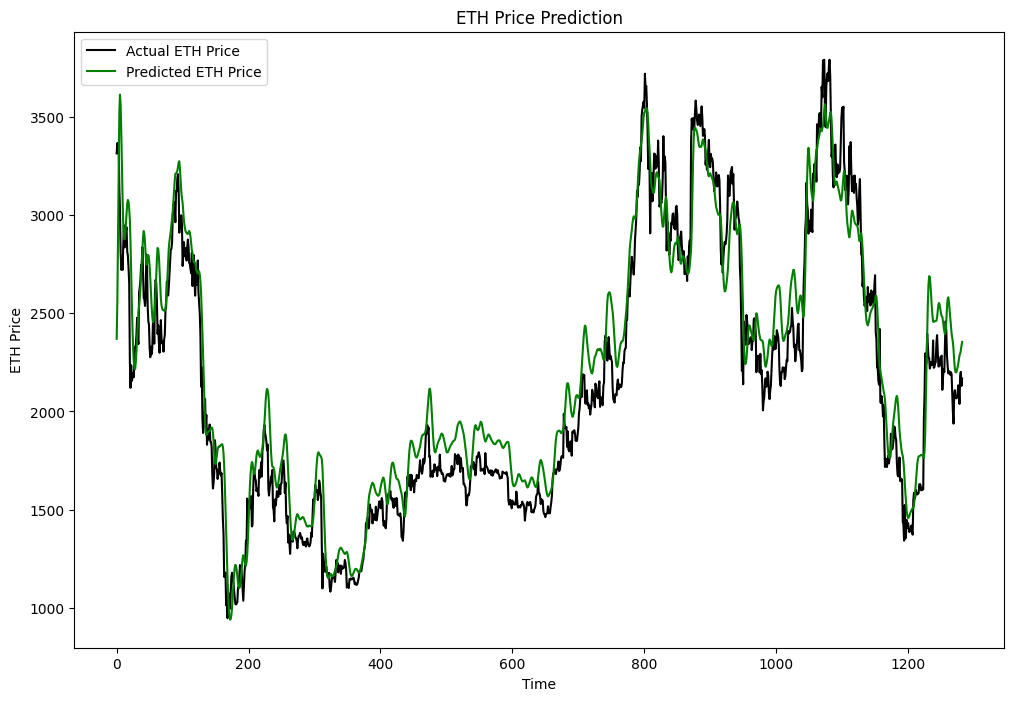

In [90]:
plt.figure(figsize=(12, 8))
plt.plot(actual_prices, color='black', label=f"Actual {cryptpo_currency} Price")
plt.plot(predicted_prices, color='green', label=f"Predicted {cryptpo_currency} Price")
plt.title(f"{cryptpo_currency} Price Prediction")
plt.xlabel("Time")
plt.ylabel(f"{cryptpo_currency} Price")
plt.legend()
plt.show()

#Predicting the next day

In [91]:
real_data=model_inputs[len(model_inputs)-prediction_days-future_days:len(model_inputs)+1]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

In [92]:
prediction=scaler.inverse_transform(model.predict(real_data))
print(prediction)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
[[1487.3574]
 [1480.1232]
 [1478.8099]
 [1480.7384]
 [1489.944 ]
 [1476.2421]
 [1475.9884]
 [1477.3948]
 [1476.42  ]
 [1452.7288]
 [1451.5288]
 [1442.5005]
 [1462.365 ]
 [1443.6498]
 [1446.7213]
 [1453.9614]
 [1449.6561]
 [1452.2245]
 [1449.529 ]
 [1447.1946]
 [1447.9115]
 [1448.5203]
 [1450.8173]
 [1447.3844]
 [1445.7916]
 [1465.1661]
 [1469.3337]
 [1466.0646]
 [1467.2213]
 [1470.8857]
 [1468.7798]
 [1468.3615]
 [1468.6884]
 [1469.2208]
 [1474.1425]
 [1474.4283]
 [1473.5375]
 [1470.7084]
 [1471.9646]
 [1471.0577]
 [1471.3035]
 [1513.6938]
 [1528.3257]
 [1554.848 ]
 [1547.2218]
 [1549.0172]
 [1567.8602]
 [1559.8258]
 [1552.3132]
 [1551.8853]
 [1544.9873]
 [1546.8569]
 [1549.26  ]
 [1547.2749]
 [1549.3418]
 [1563.36  ]
 [1545.5011]
 [1545.9696]
 [1548.2031]
 [1549.2278]
 [1561.745 ]
 [1566.8962]
 [1557.245 ]
 [1546.442 ]
 [1546.3462]
 [1547.0107]
 [1552.3981]
 [1552.6167]
 [1553.3989]
 [1531.4119]
 [1539.299 ]
 [1544.7507]
 [1542.858 ]
 [1561.4722]

#Hyperparametertunning

In [93]:
# Step 1: Install Keras Tuner
# This command should be run in your terminal or as the first cell in a notebook.
# !pip install keras-tuner -q

%pip install -q -U keras-tuner

import keras_tuner as kt

from sklearn.model_selection import train_test_split

# --- Assume x_train and y_train are pre-loaded ---
# For demonstration purposes, let's create some dummy data.
# In your actual use case, you would load your real data here.
print("Generating dummy data for demonstration...")
num_samples = 1000
timesteps = 60
features = 1
# Commenting out dummy data generation as we have actual data
# x_train = np.random.rand(num_samples, timesteps, features)
# y_train = np.random.rand(num_samples, 1)
print("Dummy data generation commented out, using actual data.")
# ----------------------------------------------------


def build_model(hp):
    """
    Builds a dynamic LSTM model for Keras Tuner.
    The tuner will optimize the number of LSTM layers, units per layer,
    dropout rates, and the optimizer.
    """
    model = Sequential()

    # Define the input layer. input_shape is only needed for the first layer.
    # The tuner will choose the number of units for the first LSTM layer.
    model.add(LSTM(
        units=hp.Int('lstm_units_1', min_value=32, max_value=128, step=16),
        return_sequences=True,
        input_shape=(x_train.shape[1], 1)
    ))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    # The tuner will decide how many additional hidden LSTM layers to add.
    # We need at least one LSTM layer, so the range should be from 0 to 2 for additional layers
    for i in range(hp.Int('num_lstm_layers', 0, 2)): # Adjusted range for additional layers
        model.add(LSTM(
            units=hp.Int(f'lstm_units_{i+2}', min_value=32, max_value=128, step=16),
            # return_sequences must be True for all but the last LSTM layer
            return_sequences= i < (hp.get('num_lstm_layers') -1) # Corrected condition
        ))
        model.add(Dropout(hp.Float(f'dropout_{i+2}', min_value=0.1, max_value=0.5, step=0.1)))


    # Add the final output layer
    model.add(Dense(units=1))

    # Tune the optimizer
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Get the optimizer instance with the specified learning rate
    optimizer_instance = tf.keras.optimizers.get(hp_optimizer)
    optimizer_instance.learning_rate = hp_learning_rate


    # Compile the model
    model.compile(
        optimizer=optimizer_instance,
        loss='mean_squared_error',
        metrics=['mean_squared_error']
    )
    return model

# Initialize the Hyperband tuner
# Hyperband is an efficient algorithm for hyperparameter optimization.
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=20, # Reduced for quicker search; increase for more thoroughness
    factor=3,
    directory='keras_tuner_dir',
    project_name='optimized_lstm_crypto'
)

# Create a callback to stop training early if validation loss stops improving
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Split data for validation during the tuning process
x_train_tune, x_val_tune, y_train_tune, y_val_tune = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

print("\nStarting hyperparameter search...")
# Start the search for the best hyperparameters
tuner.search(
    x_train_tune,
    y_train_tune,
    epochs=20, # This is the max epochs per model within a bracket
    validation_data=(x_val_tune, y_val_tune),
    callbacks=[stop_early]
)
print("Hyperparameter search complete.")

# Get the optimal hyperparameters from the search
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\n--- Optimal Hyperparameters Found ---")
print(f"Optimal Learning Rate: {best_hps.get('learning_rate')}")
print(f"Optimal Optimizer: {best_hps.get('optimizer')}")
for i in range(best_hps.get('num_lstm_layers') + 1):
    print(f"Layer {i+1} LSTM Units: {best_hps.get(f'lstm_units_{i+1}')}")
    if f'dropout_{i+1}' in best_hps.values: # Check if dropout exists for this layer
      print(f"Layer {i+1} Dropout: {best_hps.get(f'dropout_{i+1}')}")
print("-------------------------------------\n")


# Build the model with the optimal hyperparameters and train it on the full training data
print("Building and training the final model with optimal hyperparameters...")
final_model = tuner.hypermodel.build(best_hps)
history = final_model.fit(
    x_train,
    y_train,
    epochs=50, # Train for a final number of epochs
    validation_split=0.2,
    callbacks=[stop_early] # Use early stopping for the final training as well
)

print("\nFinal model training complete.")
final_model.summary()

# You can now use `final_model` to make predictions

Trial 30 Complete [00h 00m 23s]
val_loss: 0.00948899332433939

Best val_loss So Far: 0.00766696548089385
Total elapsed time: 00h 05m 13s
Hyperparameter search complete.

--- Optimal Hyperparameters Found ---
Optimal Learning Rate: 0.001
Optimal Optimizer: adam
Layer 1 LSTM Units: 48
Layer 1 Dropout: 0.1
Layer 2 LSTM Units: 128
Layer 2 Dropout: 0.1
-------------------------------------

Building and training the final model with optimal hyperparameters...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0171 - val_mean_squa

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 70, 48)         │         9,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 70, 48)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │        90,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301,061 (1.15 MB)

 Trainable params: 100,353 (392.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 200,708 (784.02 KB)

#Visualizing the actual and predicted price based on the improved model after Hyperparametertuning

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


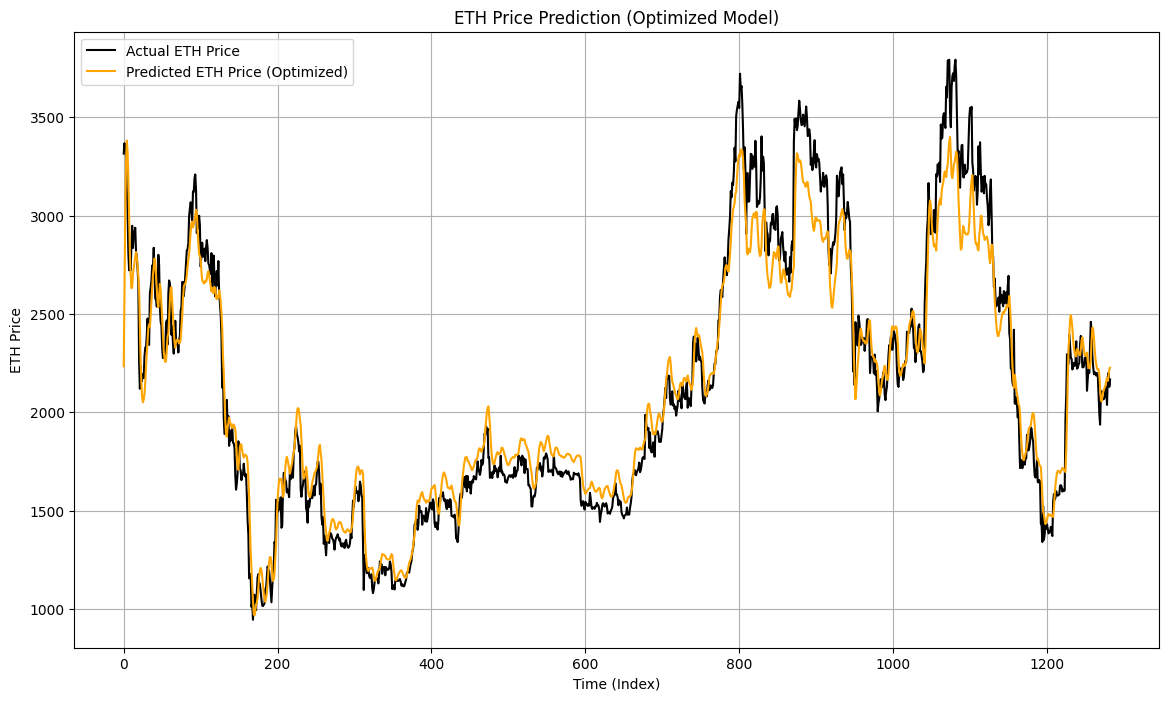


Plot generated comparing Actual vs. Optimized Predicted Prices.


In [94]:

# Use the trained final_model to make predictions on the test data
predicted_prices_optimized = final_model.predict(x_test)

# Inverse transform the scaled predictions to get actual price values
predicted_prices_optimized = scaler.inverse_transform(predicted_prices_optimized)

# Visualize the actual and predicted prices from the optimized model
plt.figure(figsize=(14, 8))
plt.plot(actual_prices, color='black', label=f"Actual {cryptpo_currency} Price")
plt.plot(predicted_prices_optimized, color='orange', label=f"Predicted {cryptpo_currency} Price (Optimized)") # Use a different color
plt.title(f"{cryptpo_currency} Price Prediction (Optimized Model)")
plt.xlabel("Time (Index)")
plt.ylabel(f"{cryptpo_currency} Price")
plt.legend()
plt.grid(True)
plt.show()

print("\nPlot generated comparing Actual vs. Optimized Predicted Prices.")


#Predict the next day price

In [97]:

# Take the last `prediction_days` values from `model_inputs`.
next_day_input = model_inputs[-prediction_days:]

# Reshape the data to fit the model's input shape (1, prediction_days, 1)
next_day_input = np.array(next_day_input)
next_day_input = np.reshape(next_day_input, (1, prediction_days, 1))

# Make the prediction using the final_model (which is the hyperparameter-tuned model)
predicted_next_day_scaled = final_model.predict(next_day_input)

# Inverse transform the prediction to get the price in the original scale
predicted_next_day_price = scaler.inverse_transform(predicted_next_day_scaled)

print(f"\nPredicted price for the next day: {predicted_next_day_price[0][0]:.2f} {against_currency}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Predicted price for the next day: 2234.59 EUR


#Predicting the next week's price

In [98]:

# Prepare data for next week's prediction
# Get the last `prediction_days` data points from the *entire* dataset
# to use as input for predicting the next day.
# We need the last `prediction_days` points from the scaled data.
last_prediction_days_data = scaled_data[-(prediction_days+future_days):-(future_days)].copy()

# Reshape the data to fit the model input shape (samples, timesteps, features)
# We want to predict the next single day, so the number of samples is 1.
last_prediction_days_data = np.reshape(last_prediction_days_data, (1, prediction_days, 1))

# Predict the next day's price
# The model predicts the value `future_days` ahead, so this prediction is for
# the day that is `future_days` days *after* the last day in our training data.
# However, the user is asking for "next week's price".
# A simple approach is to predict the price one day at a time for the next 7 days,
# using the predicted value as input for the next prediction.
# This is a sequential prediction and can accumulate errors.

# Let's predict the next 7 days iteratively
next_week_predictions_scaled = []
current_input = last_prediction_days_data.copy()

print(f"\nPredicting prices for the next 7 days based on the optimized model...")

for i in range(7):
    # Predict the next step (which is `future_days` days ahead of the last input point)
    next_day_prediction_scaled = final_model.predict(current_input)
    next_week_predictions_scaled.append(next_day_prediction_scaled[0, 0])

    # Prepare the input for the next prediction:
    # Remove the oldest data point and add the new predicted data point
    # This part is tricky. If the model was trained to predict 'future_days' ahead,
    # simply adding the *immediate* next day prediction is not strictly how the model was trained.
    # However, for an iterative prediction of the "next week", this is a common practical approach.
    # We append the predicted scaled price to the input sequence.
    # We only need the last `prediction_days` points as input for the next prediction.

    # Reshape the prediction to be added to the input sequence
    next_day_prediction_reshaped = np.reshape(next_day_prediction_scaled, (1, 1, 1))

    # Update the current_input by removing the first element and adding the new prediction
    current_input = np.append(current_input[:, 1:, :], next_day_prediction_reshaped, axis=1)


# Inverse transform the scaled predictions for the next week
next_week_predictions = scaler.inverse_transform(np.array(next_week_predictions_scaled).reshape(-1, 1))

print("\n--- Predicted Prices for the Next 7 Days ---")
for i, price in enumerate(next_week_predictions):
    # Note: The date corresponding to these predictions is not precise without more
    # date handling logic, but these represent the iterative predictions for 7 steps
    # after the last day of the dataset.
    print(f"Day {i+1}: {price[0]:.2f} {against_currency}")
print("---------------------------------------------")

# Note: The predictions are for 7 *future_days* ahead from the *last point used in the input sequence*.
# If `future_days` is not 1, this iterative prediction doesn't align perfectly with
# predicting consecutive days in the "next week" after the training data ends,
# based on the model's training objective.
# For true next-day predictions, the model would ideally be trained with `future_days=1`.
# Given the current `future_days=30`, these 7 predictions are for days 30, 31, ..., 36
# after the end of the training data.
# To accurately predict the *immediately* next 7 days, the model architecture or
# the training target (`future_days`) would need to be adjusted.

print("\nImportant Note:")
print(f"The model was trained to predict {future_days} days ahead.")
print("The 'next 7 days' predictions above are generated iteratively, where each prediction")
print(f"is for {future_days} days ahead of the last data point used as input for that step.")
print("This method can accumulate errors and may not perfectly represent the immediate next 7 days")
print("if `future_days` is significantly greater than 1.")


Predicting prices for the next 7 days based on the optimized model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

--- Predicted Prices for the Next 7 Days ---
Day 1: 2440.30 EUR
Day 2: 2428.73 EUR
Day 3: 2423.13 EUR
Day 4: 2420.37 EUR
Day 5: 2419.26 EUR
Day 6: 2419.33 EUR
Day 7: 2420.33 EUR
---------------------------------------------

Important Note:
The model was trained to predict 30 days ahead.
The 'next 7 days' predictions above are generated iteratively, where each prediction
is for 30 days ahead of the last data point used as input for that step.
This method can accumulate errors and may not perfectly represent the immediate next 7 days
if `future_days` is significantly greater than 1.


#Visualizing the predicted price of next week

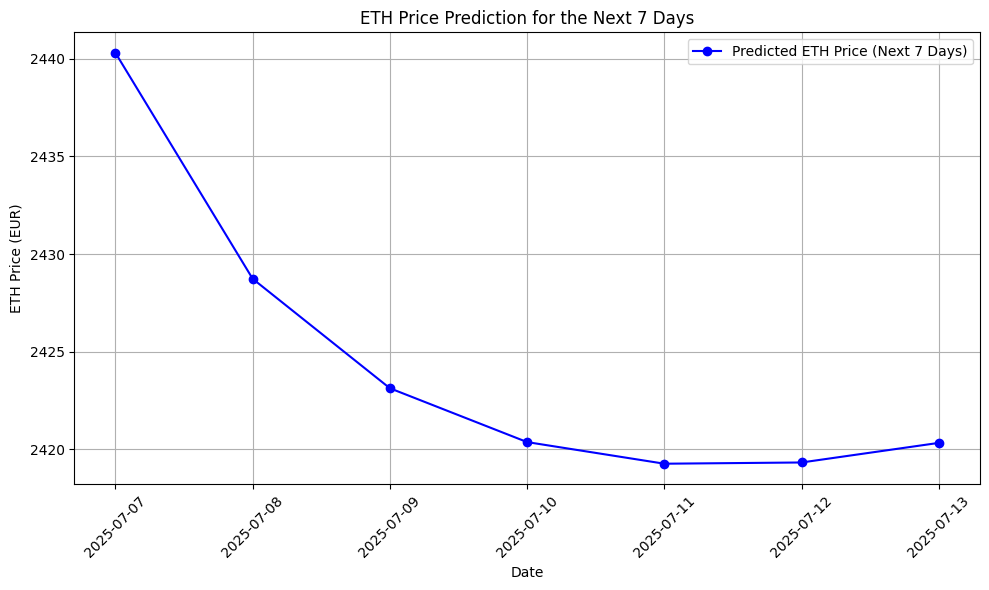


Plot generated for the next 7 days' predicted prices.


In [100]:

# Generate dates for the next 7 days for plotting
last_date_in_data = data.index[-1]
next_week_dates = [last_date_in_data + dt.timedelta(days=i+1) for i in range(7)]

# Create a plot for the next week's predicted prices
plt.figure(figsize=(10, 6))
plt.plot(next_week_dates, next_week_predictions, marker='o', linestyle='-', color='blue', label=f"Predicted {cryptpo_currency} Price (Next 7 Days)")
plt.title(f"{cryptpo_currency} Price Prediction for the Next 7 Days")
plt.xlabel("Date")
plt.ylabel(f"{cryptpo_currency} Price ({against_currency})")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

print("\nPlot generated for the next 7 days' predicted prices.")


#A few important warning and suggestions:
1.  **Evaluate Prediction Horizon:** The model is trained to predict 30 days into the future. Evaluate if this prediction horizon is suitable for your needs. If you require longer-term predictions, you might need to adjust the `future_days` parameter and potentially explore more complex model architectures or time series forecasting techniques.

2.  **Consider Other Factors:** This model solely relies on historical price data. Cryptocurrency prices are influenced by a multitude of factors, including news, regulations, market sentiment, and macroeconomic events. For more robust recommendations, consider incorporating these external factors into your analysis or using more sophisticated models that can handle multiple data sources.

3.  **Risk Management:** Cryptocurrency markets are highly volatile. Even with a predictive model, there is significant risk involved. Do not solely rely on the model's predictions for investment decisions. Always apply sound risk management principles and consider your own risk tolerance.

4.  **Interpretability:** While deep learning models can be powerful, they can also be difficult to interpret. If understanding *why* the model makes certain predictions is important, consider exploring techniques for model interpretability.
5. **Remember that predicting cryptocurrency prices is a challenging task, and no model can guarantee perfect accuracy. Use the model as a tool to inform your decisions, but always exercise caution and conduct your own research.